In [9]:
import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

SHOW_RATIO = False

def bar_chart(ax, algorithms, normalize_by=None):
    names = [x['algorithm']['name'] for x in algorithms]
    expected_results = [x.get('expected_makespan') for x in algorithms]
    actual_results = [x['makespan'] for x in algorithms]
    if SHOW_RATIO:
        ratios = [x['exec_time'] / x['comm_time'] for x in algorithms]
    else:
        ratios = [None] * len(algorithms)
    if normalize_by:
        actual_results = [x/normalize_by for x in actual_results]
        expected_results = [x/normalize_by for x in expected_results]
        plt.plot([-0.5, len(names)-0.5], [1, 1], color='#C44E52', linewidth=4)
    for i, (expected, actual, ratio) in enumerate(zip(expected_results, actual_results, ratios)):
        if not math.isnan(expected):
            ax.add_patch(Rectangle((-0.4+i, 0), 0.38, expected, color='#55A868'))
            if SHOW_RATIO:
                ax.add_patch(Rectangle(( 0.02 +i, 0), 0.38, actual*ratio, color='#DD8452'))
                ax.add_patch(Rectangle(( 0.02 +i, actual*ratio), 0.38, actual*(1-ratio), color='#4C72B0'))
            else:
                ax.add_patch(Rectangle(( 0.02 +i, 0), 0.38, actual, color='#4C72B0'))
        else:
            ax.add_patch(Rectangle((-0.4+i, 0), 0.8, actual, color='#4C72B0'))
    plt.xlim(-0.5, len(names)-0.5)
    plt.xticks(range(len(names)), names)

In [10]:
def get_name_by_path(path):
    return path.split("/")[-1].rsplit('.', 1)[0]

def platform_sort_key(item):
    return platform_order.index(get_name_by_path(item[0]))

def algo_sort_key(item):
    return algo_order.index(item['algorithm']['name'])

def algo_item_sort_key(item):
    return algo_order.index(item[0])

platform_order = [
    'platform_rack_4', 'platform_rack_8', 'platform_rack_16',
    'platform_cluster_2', 'platform_cluster_4', 'platform_cluster_8',
    'simple_4',
]
platform_names = {
    'simple_4': '4 ядра x 4 хоста, полносвязный',
    'platform_rack_4': '4 ядра x 4 хоста x 1 стойка',
    'platform_rack_8': '2 ядра x 8 хостов x 1 стойка',
    'platform_cluster_2': '4 ядра x 2 хоста x 2 стойки',
    'platform_cluster_4': '2 ядра x 4 хоста x 2 стойки',
}
algo_order = ['HEFT', 'EHEFT', 'EHEFT_caching', 'LA', 'ELA', 'ELA_caching']
algo_colors = {
    'HEFT': '#5975A4',
    'EHEFT': '#CC8963',
    'EHEFT_caching': '#5F9E6E',
    'LA': '#B55D60',
    'ELA': '#857AAB',
    'ELA_caching': '#8D7866',
}

4943.472045296372 [2848.0345980788834, 4380.71248407581, 4943.472045296372, 4380.712484080562]
1915485.973008327 [227094.79703836088, 1915485.973008327, 1894920.603632976, 1910782.9349374392]
101848.79334784843 [98416.41768865085, 9449.95676289627, 98545.69422945172, 101848.79334784843]
2405.147387639098 [2405.147387639098, 983.4069175639177, 2341.6901517794136, 1173.2113617835896]
5927.071996822837 [4820.395016913827, 3829.0517447544717, 5927.071996822837, 4848.096163590587]
2082361.6291909872 [1912776.5930083285, 310736.31924386136, 2082361.6291909872, 1926947.2278954445]
110253.76425975522 [98169.54584662002, 14123.743383605808, 110253.76425975522, 99740.48311679978]
2667.375838310763 [2500.5669030402332, 1109.6082529965972, 2667.375838310763, 1876.7745033990864]
4943.472045296372 [4380.71248407546, 2848.0345980788834, 4943.472045296372, 4380.712484080562]
1991937.935350884 [1915408.5104015558, 1991937.935350884, 227094.79703836088, 1910670.6794115957]
102306.51578309888 [98268.2499

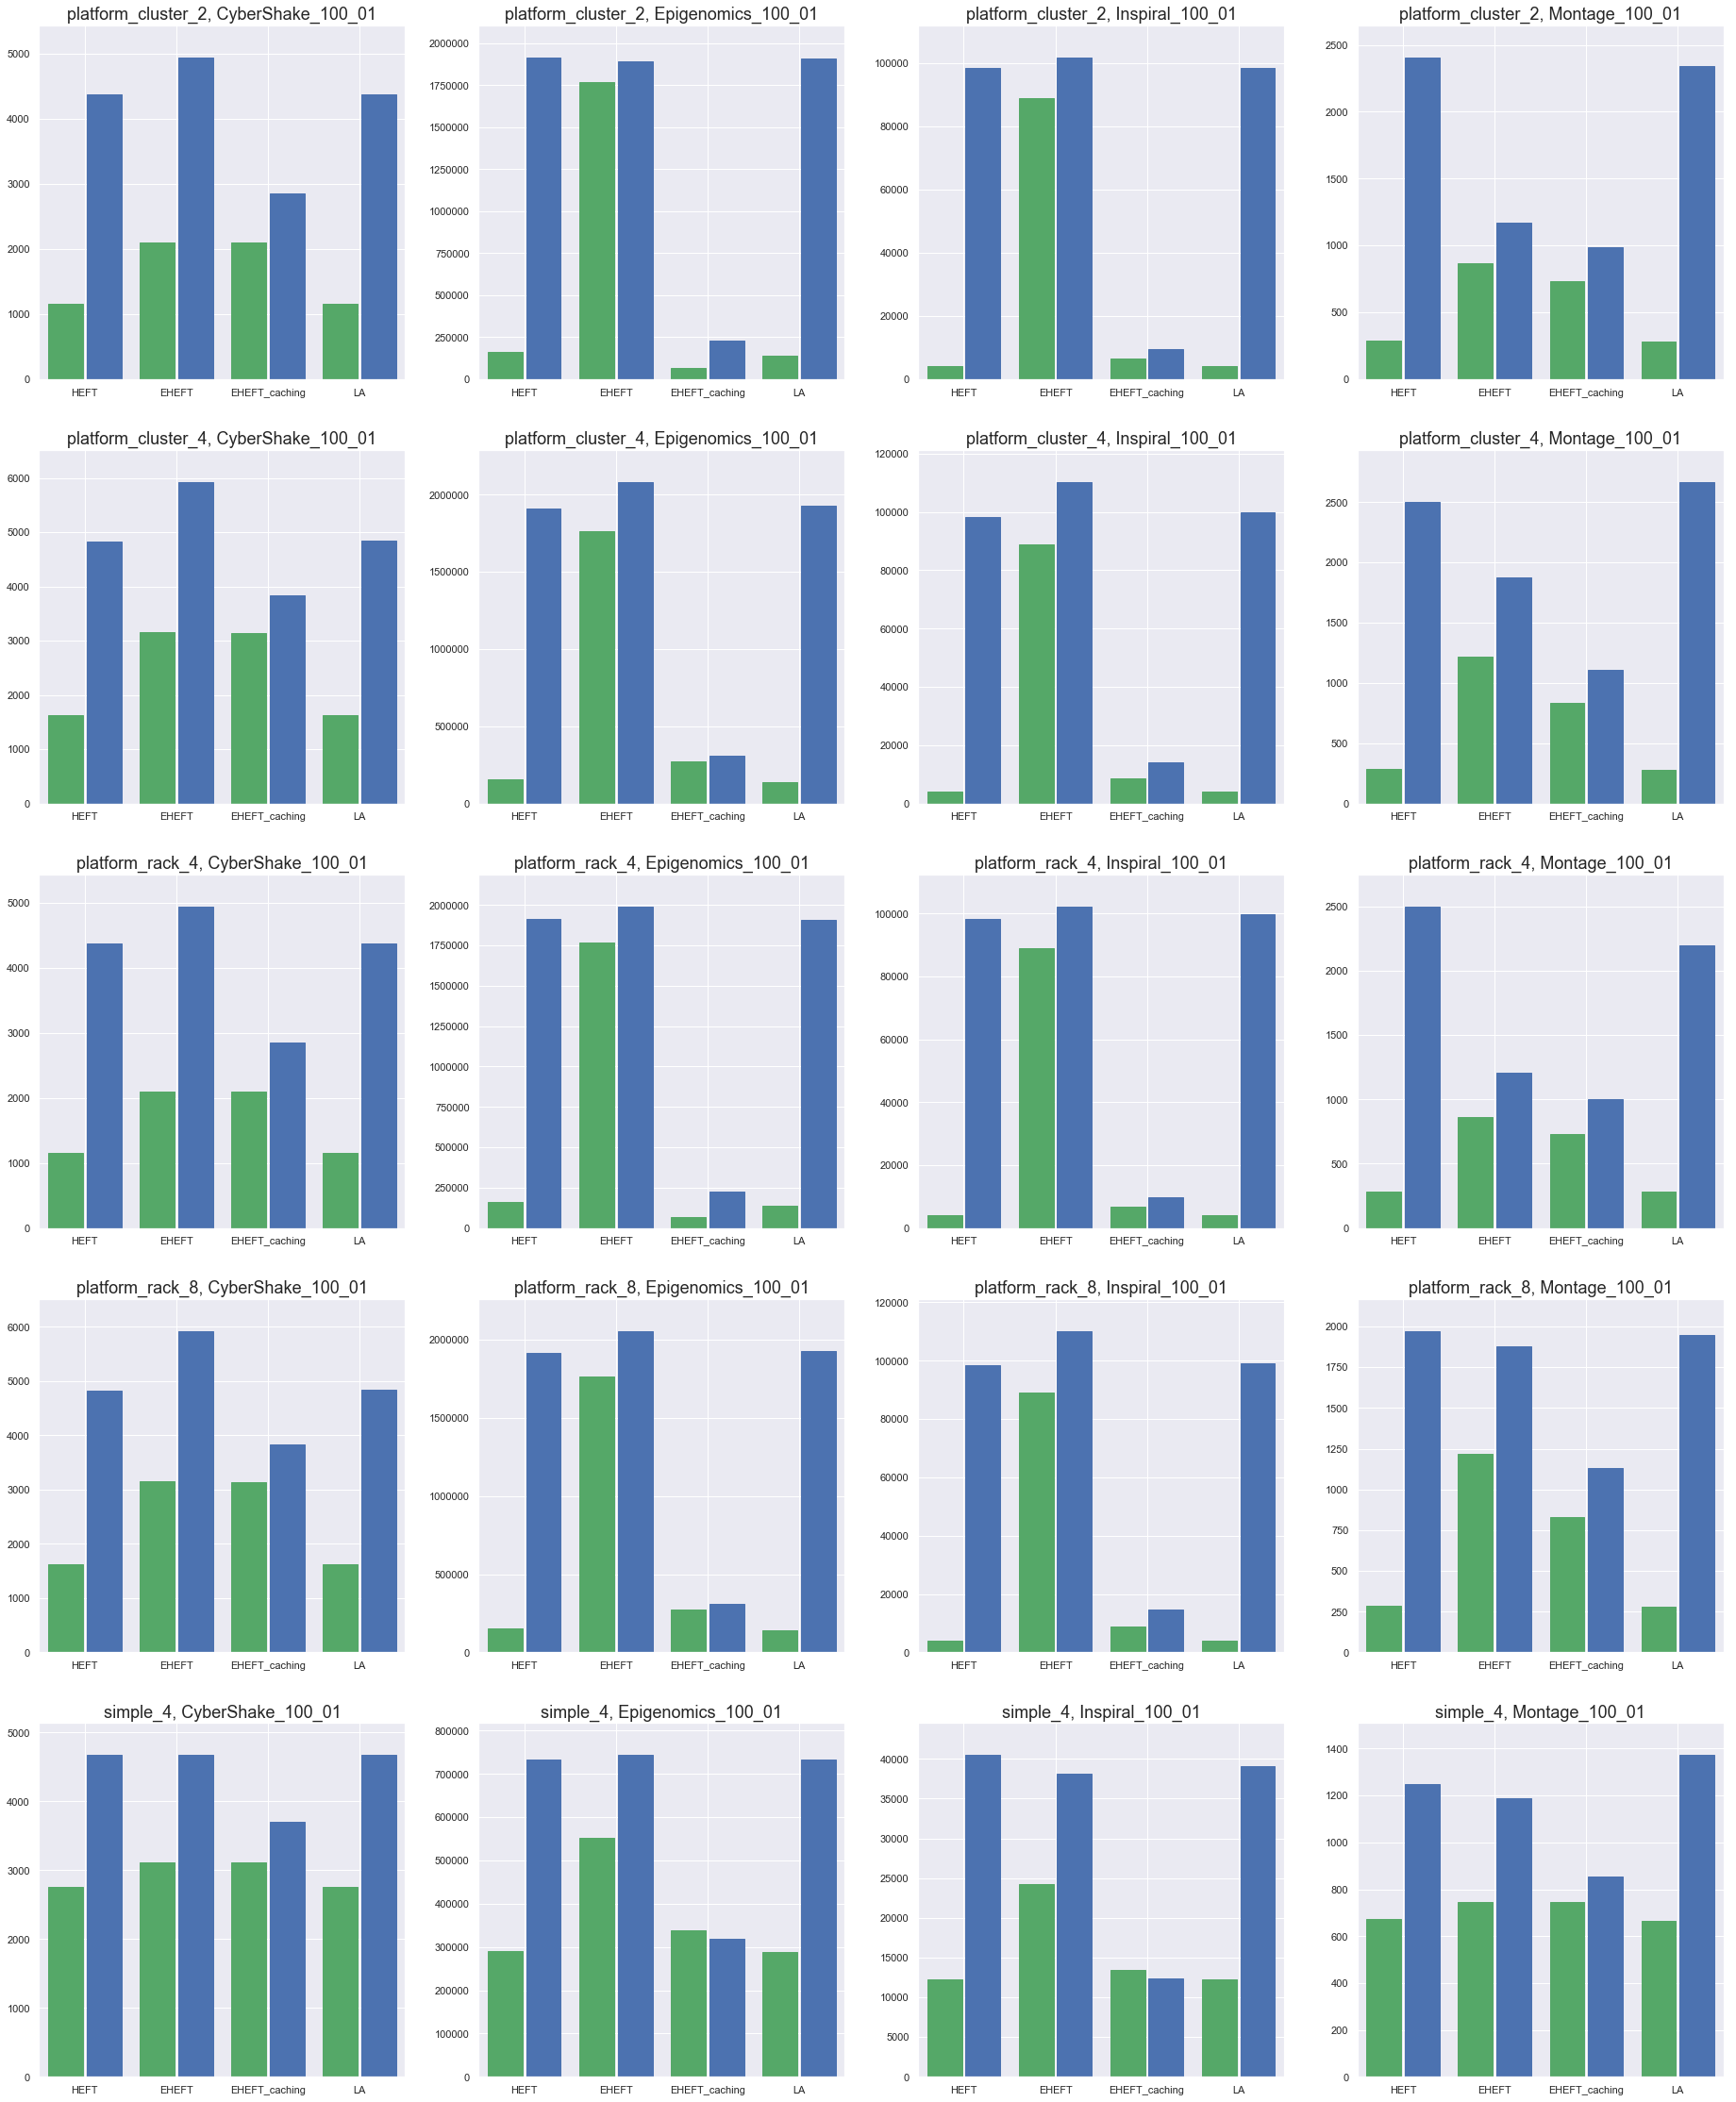

In [12]:
import json
results = json.load(open('output'))
for x in results:
    x['tasks'] = get_name_by_path(x['tasks'])
    x['platform'] = get_name_by_path(x['platform'])
    
by_platform_and_worflow = {}
for r in results:
    by_platform_and_worflow.setdefault(r['platform'], {})
    by_platform_and_worflow[r['platform']].setdefault(r['tasks'], [])
    by_platform_and_worflow[r['platform']][r['tasks']].append(r)

plt.figure(figsize=(32, 40))
counter = 1
for i, (platform, platform_results) in enumerate(sorted(by_platform_and_worflow.items())):
#     max_res = 0
#     for workflow_results in platform_results.values():
#         expected = [x['expected_makespan'] for x in workflow_results if not math.isnan(x['expected_makespan'])] or [max_res]
#         max_res = max(
#              max_res,
#              max([x['makespan'] for x in workflow_results]),
#              max(expected)
#          )
    for j, (workflow, workflow_results) in enumerate(sorted(platform_results.items())):
        ax = plt.subplot(len(by_platform_and_worflow), len(platform_results), counter)
        max_res = max([x['makespan'] for x in workflow_results])
        print(max_res, [x['makespan'] for x in workflow_results])
        plt.ylim(bottom=0, top=max_res*1.1)
        bar_chart(ax, sorted(workflow_results, key=algo_sort_key))
#         bar_chart(ax, workflow_results)
        platform = get_name_by_path(platform)
        workflow = get_name_by_path(workflow)
        plt.title(f'{platform}, {workflow}', fontsize=18)
        counter += 1

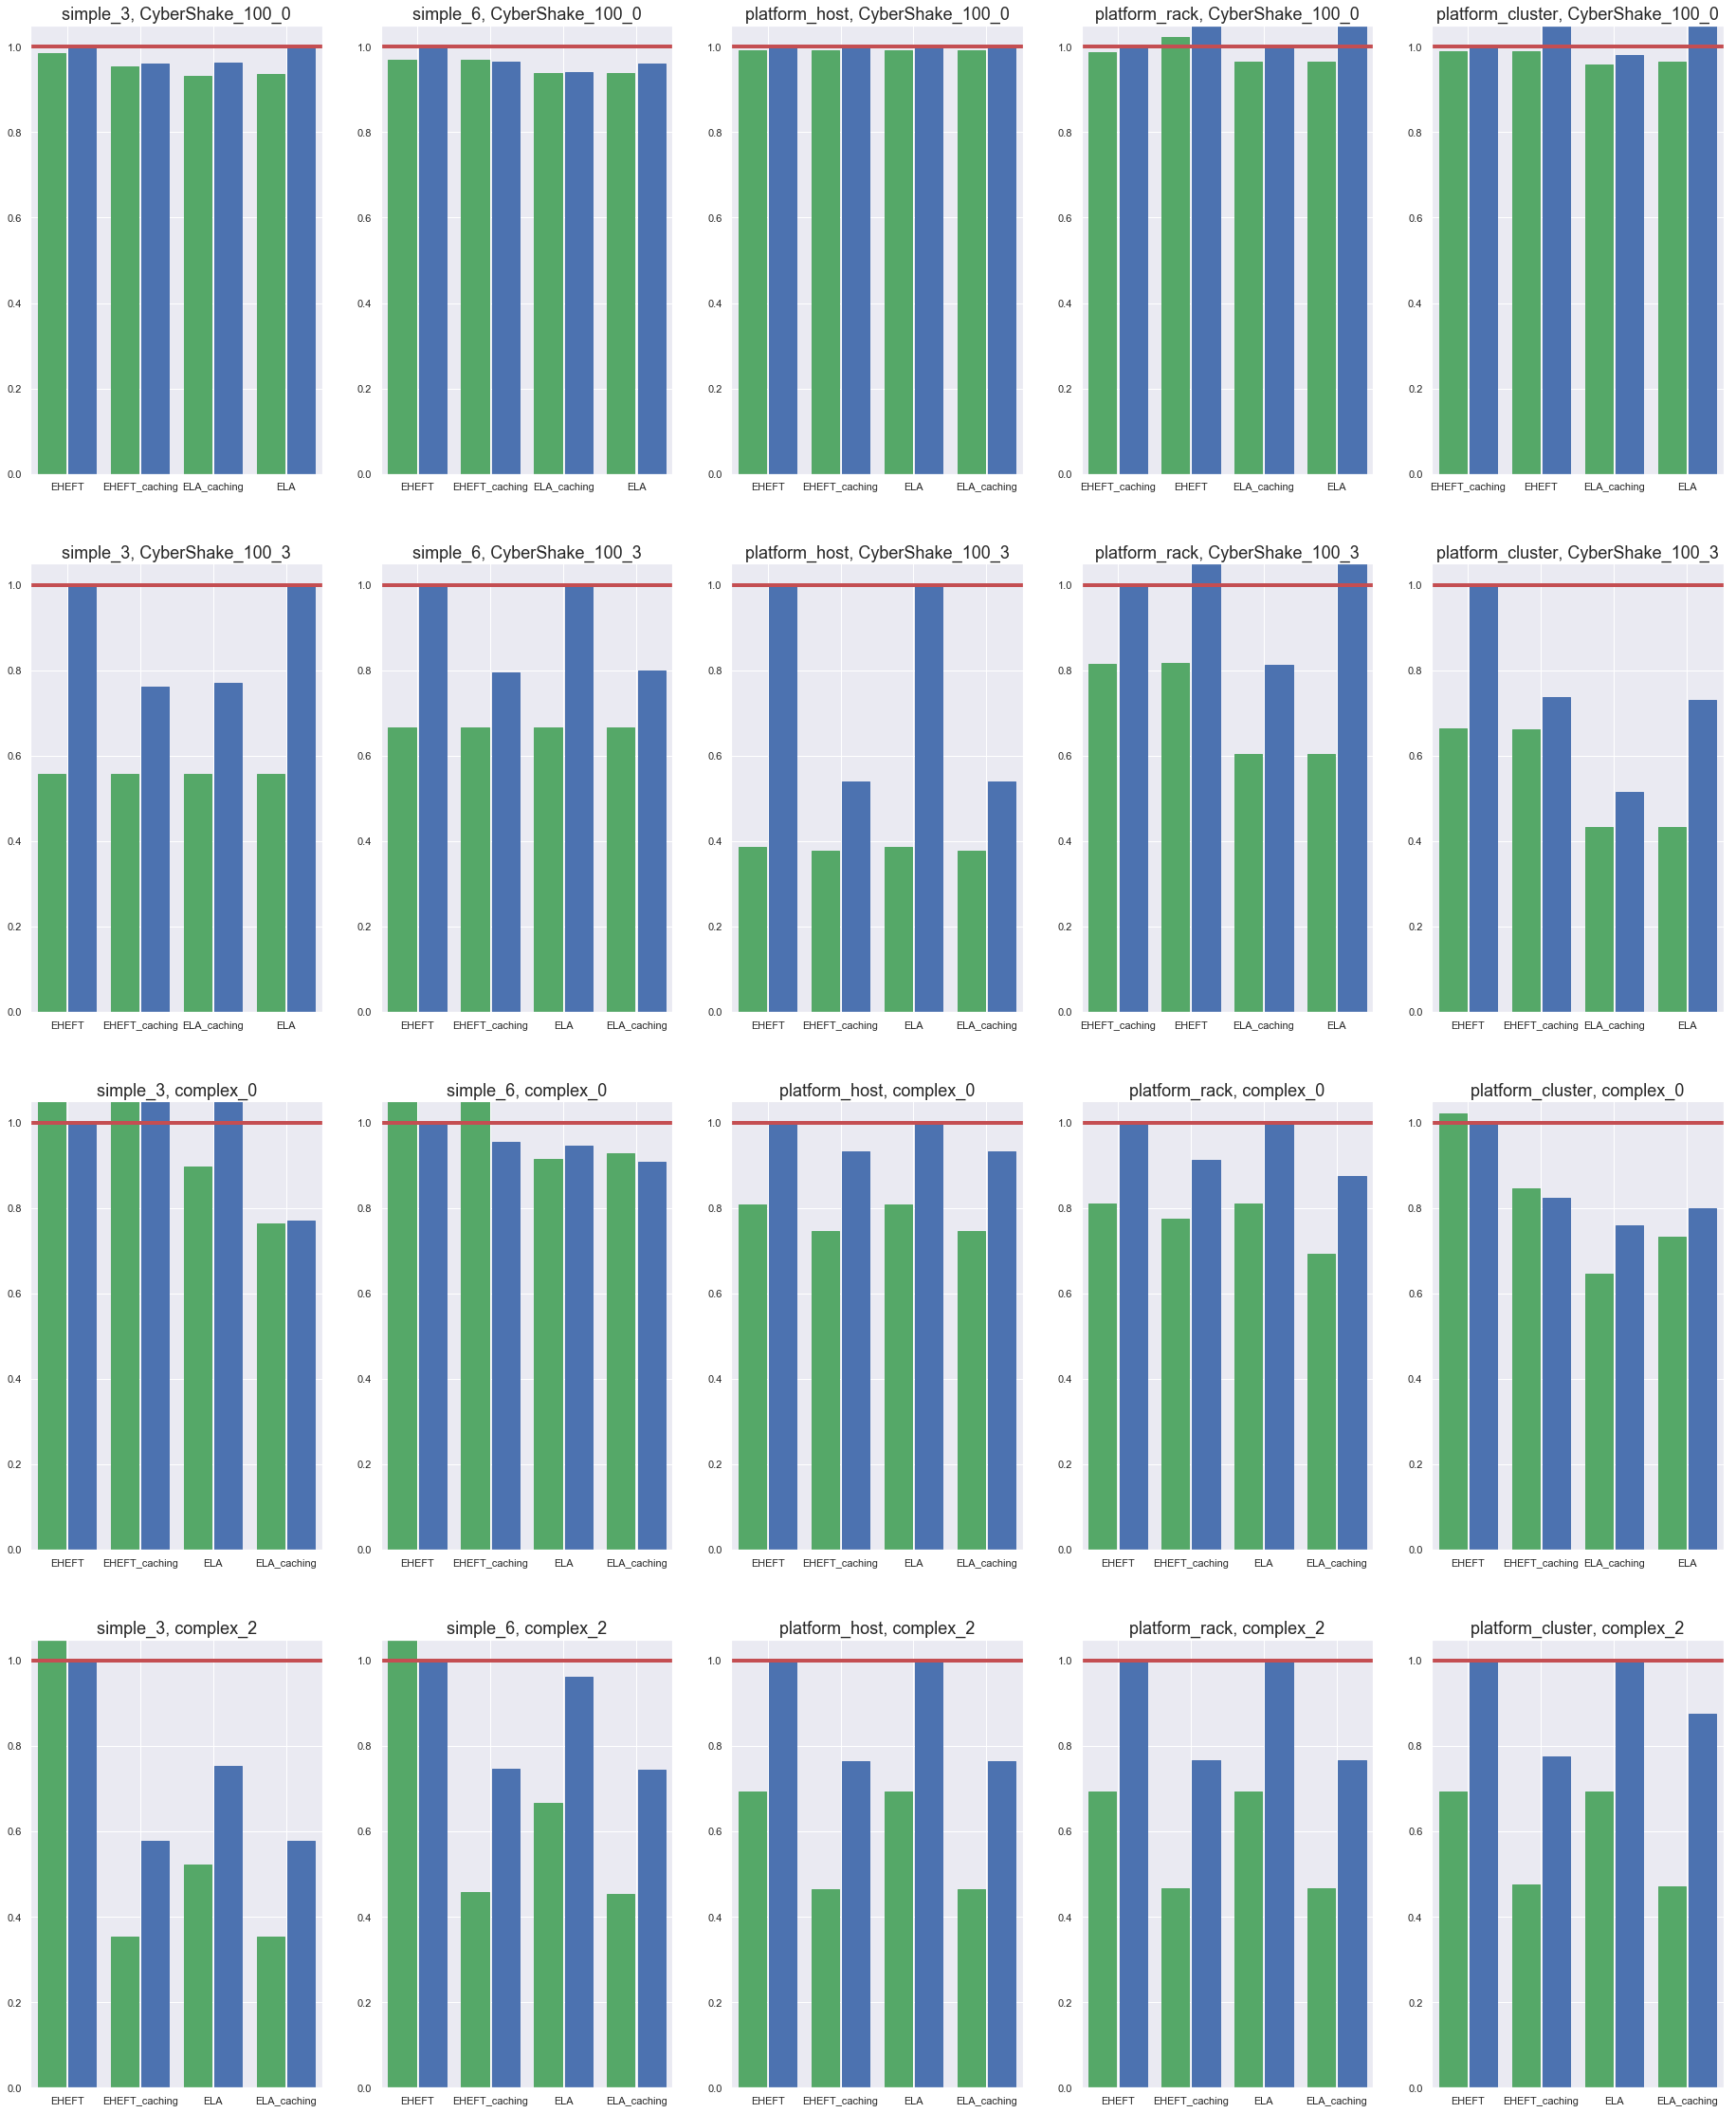

In [5]:
import json
results = json.load(open('output'))
by_platform_and_worflow = {}
for r in results:
    if 'simple_' in r['tasks']:
        continue
    by_platform_and_worflow.setdefault(r['tasks'], {})
    by_platform_and_worflow[r['tasks']].setdefault(r['platform'], [])
    by_platform_and_worflow[r['tasks']][r['platform']].append(r)

plt.figure(figsize=(32, 40))
counter = 1
for i, (workflow, workflow_results) in enumerate(sorted(by_platform_and_worflow.items())):
    max_res = 0
    for platform_results in workflow_results.values():
         max_res = max(max_res, max([x['makespan'] for x in platform_results]))
    for j, (platform, platform_results) in enumerate(sorted(workflow_results.items(), key=platform_sort_key)):
        ax = plt.subplot(len(by_platform_and_worflow), len(workflow_results), counter)
        baseline = platform_results[0]['makespan']
        plt.ylim(top=1.05)
        bar_chart(ax, platform_results, normalize_by=baseline)
        platform = platform.split("/")[-1].rsplit('.', 1)[0]
        workflow = workflow.split("/")[-1].rsplit('.', 1)[0]
        plt.title(f'{platform}, {workflow}', fontsize=18)
        counter += 1
plt.savefig('charts_percentage.png')